<a href="https://colab.research.google.com/github/wjdolan/DS_Portfolio/blob/main/Numpy_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Neural Network (using Numpy)

In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [1]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


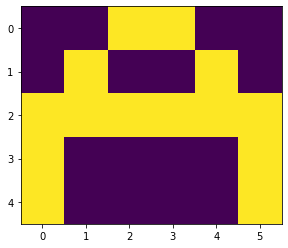

In [5]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [6]:
# converting data and labels into numpy array

"""
Convert the matrix of 0 and 1 into one hot vector
so that we can directly feed it to the neural network,
these vectors are then stored in a list x.
"""

x =[np.array(a).reshape(1, 30), np.array(b).reshape(1, 30),
								np.array(c).reshape(1, 30)]


# Labels are also converted into NumPy array
y = np.array(y)


print(x, "\n\n", y)


[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [7]:
# activation function

def sigmoid(x):
	return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
	# hidden
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# out put of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	return(a2)

# initializing the weights randomly
def generate_wt(x, y):
	l =[]
	for i in range(x * y):
		l.append(np.random.randn())
	return(np.array(l).reshape(x, y))
	
# for loss we will be using mean square error(MSE)
def loss(out, Y):
	s =(np.square(out-Y))
	s = np.sum(s)/len(y)
	return(s)

# Back propagation of error
def back_prop(x, y, w1, w2, alpha):
	
	# hidden layer
	z1 = x.dot(w1)# input from layer 1
	a1 = sigmoid(z1)# output of layer 2
	
	# Output layer
	z2 = a1.dot(w2)# input of out layer
	a2 = sigmoid(z2)# output of out layer
	# error in output layer
	d2 =(a2-y)
	d1 = np.multiply((w2.dot((d2.transpose()))).transpose(),
								(np.multiply(a1, 1-a1)))

	# Gradient for w1 and w2
	w1_adj = x.transpose().dot(d1)
	w2_adj = a1.transpose().dot(d2)
	
	# Updating parameters
	w1 = w1-(alpha*(w1_adj))
	w2 = w2-(alpha*(w2_adj))
	
	return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
	acc =[]
	losss =[]
	for j in range(epoch):
		l =[]
		for i in range(len(x)):
			out = f_forward(x[i], w1, w2)
			l.append((loss(out, Y[i])))
			w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
		print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100)
		acc.append((1-(sum(l)/len(x)))*100)
		losss.append(sum(l)/len(x))
	return(acc, losss, w1, w2)

def predict(x, w1, w2):
	Out = f_forward(x, w1, w2)
	maxm = 0
	k = 0
	for i in range(len(Out[0])):
		if(maxm<Out[0][i]):
			maxm = Out[0][i]
			k = i
	if(k == 0):
		print("Image is of letter A.")
	elif(k == 1):
		print("Image is of letter B.")
	else:
		print("Image is of letter C.")
	plt.imshow(x.reshape(5, 6))
	plt.show()




In [8]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)


[[ 1.22367499 -0.93524045 -0.06038488 -0.07054614  0.34948736]
 [ 1.23628826 -1.37466163 -1.62338754 -1.06601407  1.43101653]
 [ 0.65162291 -0.03819858 -1.58005415  0.20645299  1.97949556]
 [ 0.17455154 -0.31444721 -1.65532331 -1.5094146   1.0511865 ]
 [-0.69718977  0.53434652  1.74522456 -1.69787872  0.22208195]
 [-0.4609921  -0.21019173  2.22329673  0.31941403 -1.72841879]
 [ 1.21614548 -0.3045013  -0.25204344  0.58500187  0.49318044]
 [-1.1487785   2.22321048  0.15549893  0.64127832  1.28562323]
 [ 0.99345092 -1.79784822  0.66388185 -0.63965536  0.03149147]
 [-2.05188846 -1.5733835  -0.91836787 -1.97438596 -1.23966019]
 [ 1.40460161  0.89353608  1.75851319  1.83695952 -0.46397056]
 [ 0.49223037 -0.10066427  0.38664037  0.55985389  0.87406375]
 [-0.13049246  1.080731   -1.12617477 -3.28336893  1.21901744]
 [-0.42958105 -0.49673851 -0.13895403 -1.43111695 -0.65426634]
 [ 1.95462918  1.06750011  0.97408352  2.15822689  0.5930947 ]
 [-0.77582223  1.01122355 -0.14332745  0.71394995 -0.42

In [9]:
"""The arguments of train function are data set list x,
correct labels y, weights w1, w2, learning rate = 0.1,
no of epochs or iteration.The function will return the
matrix of accuracy and loss and also the matrix of
trained weights w1, w2"""

acc, losss, w1, w2 = train(x, y, w1, w2, 0.1, 100)


epochs: 1 ======== acc: 71.37622477469093
epochs: 2 ======== acc: 74.00588463274384
epochs: 3 ======== acc: 76.03841195398958
epochs: 4 ======== acc: 77.54784758299257
epochs: 5 ======== acc: 78.66912320493822
epochs: 6 ======== acc: 79.5251444333279
epochs: 7 ======== acc: 80.20756237743142
epochs: 8 ======== acc: 80.77916224279238
epochs: 9 ======== acc: 81.28125986270388
epochs: 10 ======== acc: 81.74050441311618
epochs: 11 ======== acc: 82.17388284885433
epochs: 12 ======== acc: 82.59209128497663
epochs: 13 ======== acc: 83.0017173422632
epochs: 14 ======== acc: 83.40663166128053
epochs: 15 ======== acc: 83.80887884049454
epochs: 16 ======== acc: 84.20926236328255
epochs: 17 ======== acc: 84.60774711558146
epochs: 18 ======== acc: 85.00375323085058
epochs: 19 ======== acc: 85.39638109939844
epochs: 20 ======== acc: 85.78458595572384
epochs: 21 ======== acc: 86.16730906815118
epochs: 22 ======== acc: 86.54356867358537
epochs: 23 ======== acc: 86.91251445590571
epochs: 24 ======== ac

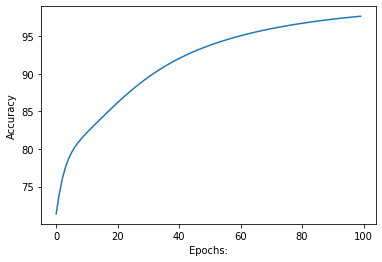

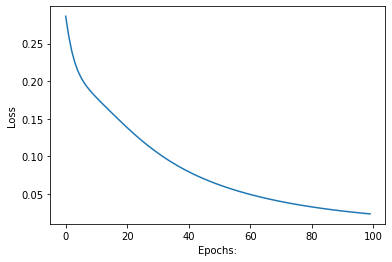

In [10]:
import matplotlib.pyplot as plt1

# ploting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


In [11]:
# the trained weights are
print(w1, "\n", w2)


[[ 1.22367499 -0.93524045 -0.06038488 -0.07054614  0.34948736]
 [ 0.91188405 -1.13684573 -2.05224435 -1.0007777   1.42846623]
 [ 0.62484187 -0.10016294 -1.55456884 -0.05395938  1.9772766 ]
 [ 0.14777049 -0.37641157 -1.62983801 -1.76982697  1.04896755]
 [-1.02159399  0.77216242  1.31636775 -1.63264234  0.21953165]
 [-0.4609921  -0.21019173  2.22329673  0.31941403 -1.72841879]
 [ 1.21614548 -0.3045013  -0.25204344  0.58500187  0.49318044]
 [-1.17555954  2.16124611  0.18098424  0.38086595  1.28340427]
 [ 0.99345092 -1.79784822  0.66388185 -0.63965536  0.03149147]
 [-2.05188846 -1.5733835  -0.91836787 -1.97438596 -1.23966019]
 [ 1.56783708  0.61250061  1.95961603  1.91218652 -0.47555284]
 [ 0.49223037 -0.10066427  0.38664037  0.55985389  0.87406375]
 [ 0.16713071  0.78095074 -0.67183265 -3.60901767  1.21934879]
 [-0.4563621  -0.55870287 -0.11346872 -1.69152932 -0.6564853 ]
 [ 2.11786464  0.78646464  1.17518636  2.23345389  0.58151241]
 [-0.61258676  0.73018808  0.0577754   0.78917695 -0.43

Image is of letter B.


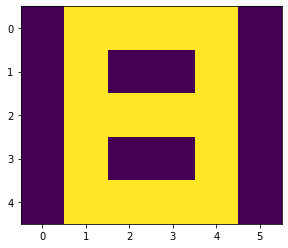

In [12]:

"""
The predict function will take the following arguments:
1) image matrix
2) w1 trained weights
3) w2 trained weights
"""
predict(x[1], w1, w2)